# 차원 축소

## 공통 코드

In [2]:
# 파이썬
# ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 좀 더 고급화하기 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
# 0.20 이상 버전에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해 시드 고정
# 데이터를 분할할 때 동일한 분할을 만들어 냄
np.random.seed(21)

## PCA

### 특이값 분해(SVD)를 이용한 행렬의 분해

In [18]:
# 데이터 생성
# 3차원 데이터 60개

np.random.seed(21)
m = 60
 # 노이즈
noise = 0.1
# 가중치 - 다른 값을 사용해도 무방
w1, w2 = 0.1, 0.3 


angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))

# 분해가 가능한 행렬을 만드는 과정
# 수학적인 부분이라 크게 상관 x
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
# 여기서 noise 는 잡음을 섞이 위한 것이므로 아무 숫자나 가능
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
# 여기서의 w1, w2 는 데이터 변환을 위한 가중치이므로 아무 값이나 가능
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
#print(X)

X_centered = X - X.mean(axis = 0)
# 특이값 분해 수행 - U, x, Vt 행렬로 분할
U, s, Vt = np.linalg.svd(X_centered)

# 주성분 - Vt 를 활용
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

print(c1, c2)

# 실제 변환된 결과
W2 = Vt.T[:, 2]
print(W2[:5])

X2D = X_centered.dot(W2)

print(X2D[:5]) 
# 3차원에서 2차원으로 차원이 하나 줄어듦

[-0.949 -0.266 -0.168] [-0.301  0.924  0.238]
[-0.092 -0.276  0.957]
[ 0.006 -0.14  -0.176  0.034 -0.125]


In [19]:
# sklearn 의 PCA 가 SVD 를 이용함

np.random.seed(21)
m = 60
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))

from sklearn.decomposition import PCA

# 2개의 주성분을 추출해주는 PCA 의 인스턴스
# 이전의 차원과 관계 없이 데이터를 2차원으로 줄임
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

print(X2D[:5])
# 여기도 3차원 데이터가 2차원으로 축소되었음

[[-0.475  1.065]
 [-1.34   0.212]
 [-0.864 -1.355]
 [ 0.37   1.167]
 [-1.327  0.357]]


In [21]:
# 분산의 비율 확인
print('설명 가능한 분산의 비율 :', pca.explained_variance_ratio_)
# [0.464 0.291]
# 첫번째 주성분이 0.464 만큼의 분산을 설명
# 두번째 주성분은 0.291 만큼의 분산을 설명
# 2개의 주성분이 있으면 0.755 만큼의 분산을 설명

print('잃어버린 분산의 비율 :', 1 -  pca.explained_variance_ratio_.sum())
# 약 0.2446

설명 가능한 분산의 비율 : [0.464 0.291]
잃어버린 분산의 비율 : 0.2446088609655802


In [36]:
# PCA 의 데이터 복원

np.random.seed(21)
m = 60
noise = 0.1
w1, w2 = 0.1, 0.3 

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))

X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
# 원본 데이터 5개 출력
print(X[:3])

# 데이터를 2차원으로 축소
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
# 2차원으로 줄어든 데이터를 다시 복원
X3D_inverse = pca.inverse_transform(X2D)

# 복원한 데이터를 출력해서 비교
print(X3D_inverse[:3])
# 이전과 값이 비슷하지만 약간씩 차이를 보임

[[ 0.858 -0.205  0.029]
 [ 1.059  0.484  0.095]
 [-0.909  0.171 -0.222]]
[[ 0.859 -0.203  0.024]
 [ 1.046  0.445  0.229]
 [-0.925  0.122 -0.054]]


In [37]:
# 2개의 배열이 같은지 확인
print(np.allclose(X, X3D_inverse)) # False

False


In [40]:
# 오차확인
# 각 행에 대해 오차를 구해서 이상치를 탐지할 수 있음
# 이상치는 복원을 했을 때 오차가 크게 발생함
print(X[0], X3D_inverse[0])
print(np.abs(X3D_inverse - X)[:3])

[ 0.858 -0.205  0.029] [ 0.859 -0.203  0.024]
[[0.001 0.002 0.006]
 [0.013 0.039 0.134]
 [0.016 0.049 0.169]]


In [41]:
# 주성분 확인
print(pca.components_)

[[-0.949 -0.266 -0.168]
 [ 0.301 -0.924 -0.238]]


### 주식 데이터를 이용한 주성분 분석

In [44]:
# 데이터 가져오기

sp500_px = pd.read_csv('./data/sp500_data.csv.gz', index_col = 0)
oil_px = sp500_px[['XOM', 'CVX']]
print(oil_px.head())

                 XOM       CVX
1993-01-29 -0.016991  0.072921
1993-02-01  0.016991  0.102089
1993-02-02  0.084954  0.029168
1993-02-03  0.067964  0.058337
1993-02-04  0.034378  0.044272


In [45]:
pca = PCA(n_components = 2)
pca.fit(oil_px)

# 주성분 분석의 결과를 DataFrame 으로 생성
# 데이터의 내용은 주성분, 컬럼은 데이터의 컬럼을 사용
loadings = pd.DataFrame(pca.components_, columns = oil_px.columns)

print(loadings)

        XOM       CVX
0 -0.664711 -0.747101
1  0.747101 -0.664711


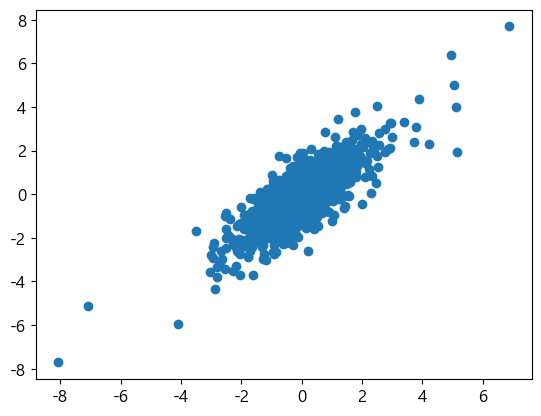

In [48]:
# 분포 확인
plt.scatter(oil_px['XOM'], oil_px['CVX'])

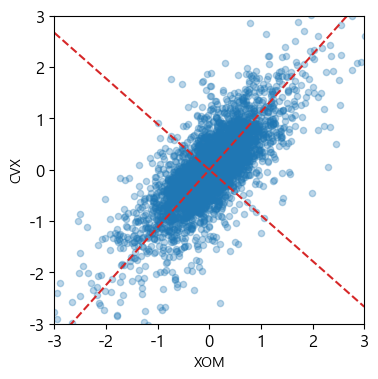

In [59]:
def abline(slope, intercept, ax):
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

# scatter 그리기
ax = oil_px.plot.scatter(x = 'XOM', y = 'CVX', alpha = 0.3, figsize = (4, 4))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# 축(사선) 그리기
ax.plot(*abline(loadings.loc[0, 'CVX']/ loadings.loc[0, 'XOM'], 0, ax),
        '--', color = 'C3')
ax.plot(*abline(loadings.loc[1, 'CVX']/ loadings.loc[1, 'XOM'], 0, ax),
        '--', color = 'C3')
plt.show()

### 피처의 중요도 파악 - 얼만큼이나 설명할 수 있는가

In [60]:
# 데이터 가져오기

# 2011 년 이후의 데이터만 가져오기
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX',
              'XOM', 'SLB', 'COP', 'JPM', 'WFC',
              'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
print(top_sp.head())


                AAPL       AXP       COP      COST      CSCO       CVX  \
2011-01-03  0.527368  0.093870 -0.336272 -0.240605  0.035704  0.240681   
2011-01-04 -0.154321 -0.431788 -0.463161 -0.171859  0.008926 -0.584516   
2011-01-05  0.597152  0.895406 -0.057104 -0.859307  0.169599  0.446985   
2011-01-06 -0.132850 -0.612646 -0.463161  0.249200  0.035706 -0.919751   
2011-01-07  0.285820 -0.537242 -0.006350 -0.257788  0.098187  0.180511   

                  HD      INTC       JPM      MSFT       SLB       TGT  \
2011-01-03  0.099184 -0.137211  0.512093 -0.061805 -0.325923  0.455646   
2011-01-04 -0.541005  0.025726  0.335894  0.132440 -2.030049 -0.580720   
2011-01-05 -0.054099 -0.214392  0.689468  0.088294  1.536499 -0.482448   
2011-01-06 -0.189354  0.085757  0.070713  0.688689 -1.927614 -0.786210   
2011-01-07 -0.036064 -0.042878 -0.795539 -0.035317  0.931215 -0.089345   

                 USB       WFC       WMT       XOM  
2011-01-03 -0.234866  0.250042  0.294839  0.736805  
2011

In [61]:
# 피처의 중요도를 파악하기 위해서 
# 주성분의 갯수를 지정하지 않음
sp_pca = PCA()
sp_pca.fit(top_sp)

PCA()

In [65]:
# 설명 가능한 분산의 비율을 확인
print(sp_pca.explained_variance_)
# 전체에서 차지하는 비율
print(sp_pca.explained_variance_ / sum(sp_pca.explained_variance_))

[3.215 1.037 0.759 0.449 0.384 0.301 0.205 0.175 0.152 0.151 0.129 0.106
 0.06  0.05  0.03  0.026]
[0.445 0.143 0.105 0.062 0.053 0.042 0.028 0.024 0.021 0.021 0.018 0.015
 0.008 0.007 0.004 0.004]


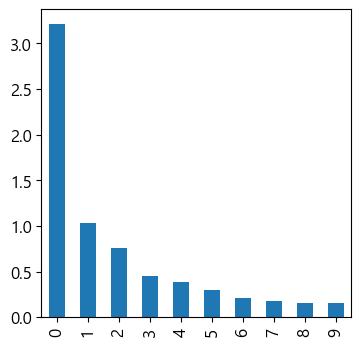

In [67]:
explained_variance = pd.DataFrame(sp_pca.explained_variance_)

# 10개 데이터를 뽑아서 막대 그래프로 표현
ax = explained_variance.head(10).plot.bar(legend = False, figsize = (4, 4))
ax.set_label('COMPONANTS')

plt.show()

In [68]:
# 5개의 주성분에 미치는 중요도를 DataFrame 으로 생성
loadings = pd.DataFrame(sp_pca.components_[0:5,], columns = top_sp.columns)
print(loadings)
# 값의 절대값이 작으면 미치는 영향이 적은 것으로 중요하지 않은 피처

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0 -0.300825 -0.246332 -0.261529 -0.273634 -0.064059 -0.444490 -0.207983   
1 -0.505116 -0.139426  0.174212 -0.416307 -0.031939  0.289373 -0.278002   
2 -0.786730  0.135458 -0.002367  0.465862 -0.007524  0.082374  0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4  0.111576 -0.596666 -0.005813  0.555529 -0.039860  0.109016 -0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0 -0.076956 -0.196397 -0.105012 -0.481786 -0.148833 -0.116421 -0.145684   
1 -0.033898 -0.040723 -0.053954  0.472494 -0.228123 -0.054796 -0.047427   
2 -0.003518  0.062261  0.016248 -0.194822  0.160833  0.048976  0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4 -0.072047 -0.385160 -0.077135  0.181332 -0.055557 -0.155440 -0.216425   

        WMT       XOM  
0 -0.122304 -0.317952  
1 -0.222889  0.154192  
2  0.175806  0.090167  
3 

### 스크리 그래프 그리기

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


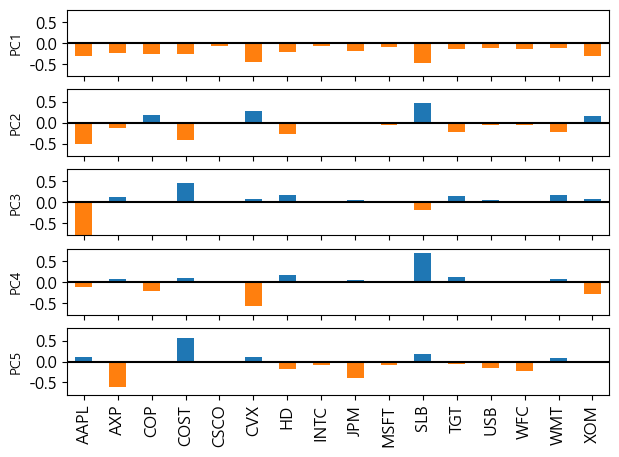

In [76]:
# 스크리 그래프 - 주성분 분석 후 주성분에 대한 피처의 중요도를 시각화

# 가장 큰 값에 1.01 을 곱함
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5,])))

# 세로로 5개의 영역을 만들고 X 축을 서로 공유
# sharex 를 True 로 지정해서 공유
# 가로로 영역을 만들고 Y 축을 공유하는 경우 sharey 를 사용
f, axes = plt.subplots(5, 1, figsize = (7, 5), sharex = True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i,]
    # 양수면 파랑(C0), 음수면 오렌지색(C1)
    colors = ['C0' if i > 0 else 'C1' for i in pc_loadings]
    ax.axhline(color = '#000000')
    pc_loadings.plot.bar(ax = ax, color = colors)
    ax.set_ylabel('PC' + str(i + 1))
    ax.set_ylim(-maxPC, maxPC)
    
plt.show()

### MNIST 이미지에서 적절한 차원을 찾고 이미지를 압축해서 출력

In [77]:
# 데이터 가져오기
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 28x28 크기의 이미지
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.target = mnist.target.astype(np.uint8)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [79]:
X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(52500, 784) (17500, 784)


In [80]:
# 차원의 갯수를 설정하지 않고 분산의 비율보다 큰 갯수 찾기
# 0.95 비율보다 큰 분산 찾기

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
# 차원은 1차원부터 시작하므로 1을 더함
d = np.argmax(cumsum >= 0.95) + 1
print(d)

153


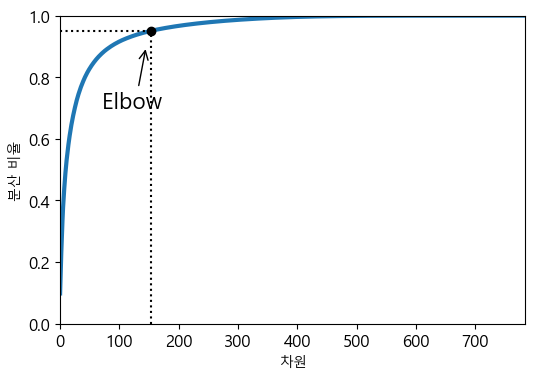

In [89]:
# 시각화를 통해 elbow 찾기

plt.figure(figsize = (6, 4))
plt.plot(cumsum, linewidth = 3)
plt.axis([0, 784, 0, 1])

plt.xlabel('차원')
plt.ylabel('분산 비율')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, 'ko')
plt.annotate('Elbow ', xy = (145, 0.90), xytext = (70, 0.7), 
             arrowprops = dict(arrowstyle = '->'), fontsize = 16)
plt.show()

In [93]:
# 분산 비율이 0.95 이상인 PCA 만들기

# PCA 를 생성할 때 비율을 지정
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

print(pca.n_components_) # 153
print(np.sum(pca.explained_variance_ratio_)) # 0.9500
# 분산 비율을 순서대로 나타냄
print(pca.explained_variance_ratio_[:10])

153
0.9500191716677127
[0.098 0.071 0.062 0.054 0.049 0.043 0.033 0.029 0.028 0.023]


### 복원한 이미지와 원래 이미지를 출력

In [94]:
pca = PCA(n_components = 153)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
# 복원된 이미지 확인
print(X_recovered.shape) # (52500, 784)

(52500, 784)


In [95]:
# 출력용 함수 생성
def plot_digits(instances, images_per_row = 5, **options):
    size = 28
    # 1줄에 출력할 이미지 갯수 설정
    image_per_row = min(len(instances), images_per_row)
    # 1차원 이미지를 다시 2차원으로 재구성
    images = [instance.reshape(size, size) for instance in instances]
    # 행의 갯수 계산
    n_rows = (len(instances) - 1) // image_per_row + 1
    row_images = []
    # 뒤의 빈 공간 채우기
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size * size * n_empty)))
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis = 1))
        
    image = np.concatenate(row_images, axis = 0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis('off')

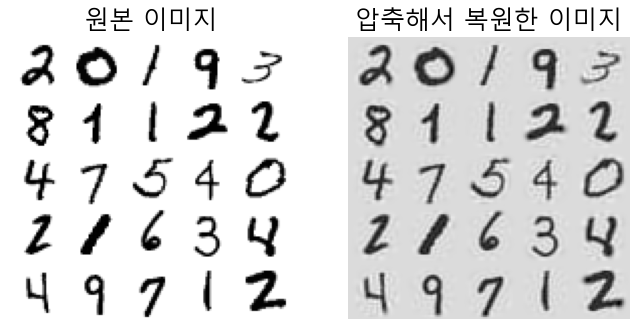

In [100]:
# 원본 이미지 출력

plt.figure(figsize = (8, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title('원본 이미지', fontsize = 18)

# 복원 이미지 출력

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title('압축해서 복원한 이미지', fontsize = 18)

plt.show()
# 전, 후를 비교했을 때 거의 동일함
# 뒤의 색이 다른 이유는 압축 과정에서 배경 색(배경의 차원)이 버려졌기 때문

In [101]:
%%time
pca = PCA(n_components = 153, svd_solver = 'full')
X_reduced = pca.fit_transform(X_train)

CPU times: total: 25.5 s
Wall time: 4.42 s


In [102]:
%%time
pca = PCA(n_components = 153, svd_solver = 'randomized')
X_reduced = pca.fit_transform(X_train)

CPU times: total: 13.4 s
Wall time: 2.7 s


In [103]:
%%time
pca = PCA(n_components = 153, svd_solver = 'auto')
X_reduced = pca.fit_transform(X_train)

CPU times: total: 13.1 s
Wall time: 2.69 s
